In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:

import pandas as pd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('C:/Users/oem/Videos/Steam Big Data 110324/proyecto-big-data/app/Pruebas/Hipotesis 1/Full_modificado.csv')

# Contar la cantidad de juegos multijugador y para un solo jugador
multijugador = df[df['Multiplayer'] == 1].shape[0]
solitario = df[df['Multiplayer'] == 0].shape[0]

# Calcular las proporciones
proporcion_multijugador = multijugador / df.shape[0]
proporcion_solitario = solitario / df.shape[0]

print("Cantidad de juegos multijugador:", multijugador)
print("Cantidad de juegos en solitario:", solitario)
print("Proporción de juegos multijugador:", proporcion_multijugador)
print("Proporción de juegos en solitario:", proporcion_solitario)

if proporcion_multijugador > proporcion_solitario:
    print("La hipótesis de que los juegos multijugador son más populares es compatible con los datos.")
elif proporcion_multijugador < proporcion_solitario:
    print("La hipótesis de que los juegos en solitario son más populares es compatible con los datos.")
else:
    print("No se puede concluir que un tipo de juego sea más popular que el otro basado en estos datos.")


Cantidad de juegos multijugador: 1160
Cantidad de juegos en solitario: 3225
Proporción de juegos multijugador: 0.2629789163454999
Proporción de juegos en solitario: 0.731126728632963
La hipótesis de que los juegos en solitario son más populares es compatible con los datos.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar los datos desde el archivo CSV
df = pd.read_csv('C:/Users/oem/Videos/Steam Big Data 110324/proyecto-big-data/app/Pruebas/Hipotesis 1/Full_modificado.csv')

# Eliminar filas con valores faltantes en la columna 'Multiplayer'
df = df.dropna(subset=['Multiplayer'])

# Seleccionar las características (features) y la variable objetivo (target)
X = df[['Cantidad de descargas', 'Precio']]  # Puedes agregar más características si lo deseas
y = df['Multiplayer']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.7286202964652223


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [6]:

# Cargar datos
data = pd.read_csv("C:/Users/oem/Videos/Steam Big Data 110324/proyecto-big-data/app/Pruebas/Hipotesis 1/Full_modificado.csv")

# Dividir datos en características y variable objetivo
X = data['Cantidad de descargas'].values.reshape(-1, 1)  # 'Microtransacciones' es la columna que indica si el juego tiene microtransacciones
y = data['Multiplayer'].values

#Se añadio que sea 0 si es nan
y = np.nan_to_num(y, nan=0)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo de regresión logística

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.739524348810872


In [7]:
data.isnull().sum()

ID del juego                0
Géneros                    11
Categorías                 26
Fecha de Lanzamiento     1664
Multiplayer                26
Cantidad de descargas       0
Precio                      0
In-Purchased                0
Fecha                       0
Dias_Pasados                0
Minutos Totales             0
dtype: int64

In [8]:
data1 = pd.read_csv("C:/Users/oem/Videos/Steam Big Data 110324/proyecto-big-data/app/Pruebas/Hipotesis 1/Full_modificado.csv")
data1.head(10)

,ID del juego,Géneros,Categorías,Fecha de Lanzamiento,Multiplayer,Cantidad de descargas,Precio,In-Purchased,Fecha,Dias_Pasados,Minutos Totales
0,330450,"Action, Casual, Indie","Single-player, Multi-player, Steam Achievement...","{'date': '16 Oct, 2015'}",1.0,1,0,0,16/10/2015 00:00,3097,76
1,330680,"Action, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '18 Nov, 2014'}",0.0,1,599,0,18/11/2014 00:00,3429,56
2,275060,"Action, Adventure","Single-player, Multi-player, Co-op, Steam Achi...","{'date': '11 Jun, 2015'}",1.0,1,399,0,11/06/2015 00:00,3224,709
3,331190,"Action, Indie","Single-player, Full controller support, Steam ...","{'date': '8 Sep, 2015'}",0.0,4,999,0,08/09/2015 00:00,3135,865
4,331220,"Action, Indie","Multi-player, Shared/Split Screen, Steam Achie...","{'date': '4 Dec, 2014'}",1.0,2,799,0,04/12/2014 00:00,3413,106
5,331340,"Adventure, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '29 Jan, 2015'}",0.0,1,299,0,29/01/2015 00:00,3357,202
6,331400,"Action, Adventure, Casual, Indie, RPG","Single-player, Steam Achievements, Steam Tradi...","{'date': '24 Nov, 2014'}",0.0,1,299,0,24/11/2014 00:00,3423,76
7,331570,"Action, Adventure, Casual, Indie","Single-player, Steam Achievements, Full contro...","{'date': '5 Jun, 2015'}",0.0,1,399,0,05/06/2015 00:00,3230,75
8,331720,"Action, Indie, Strategy","Single-player, Steam Achievements, Steam Tradi...","{'date': '16 Nov, 2015'}",0.0,2,99,0,16/11/2015 00:00,3066,447
9,332330,Action,"Single-player, Multi-player, Shared/Split Scre...","{'date': '21 Oct, 2015'}",1.0,1,999,0,21/10/2015 00:00,3092,110


In [9]:
data.describe()

,ID del juego,Multiplayer,Cantidad de descargas,Precio,In-Purchased,Dias_Pasados,Minutos Totales
count,4.411000e+03,4385.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,7.569234e+05,0.264538,1.555430,898.132850,0.040807,1939.483564,635.972115
std,5.218415e+05,0.441137,1.027645,1018.034391,0.197865,974.650106,3165.241506
min,1.002000e+03,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000
25%,4.090200e+05,0.000000,1.000000,104.000000,0.000000,1398.000000,56.000000
50%,5.584200e+05,0.000000,1.000000,499.000000,0.000000,1398.000000,210.000000
75%,9.791700e+05,1.000000,2.000000,1299.000000,0.000000,2693.000000,449.500000
max,2.756830e+06,1.000000,12.000000,7999.000000,1.000000,6753.000000,156425.000000


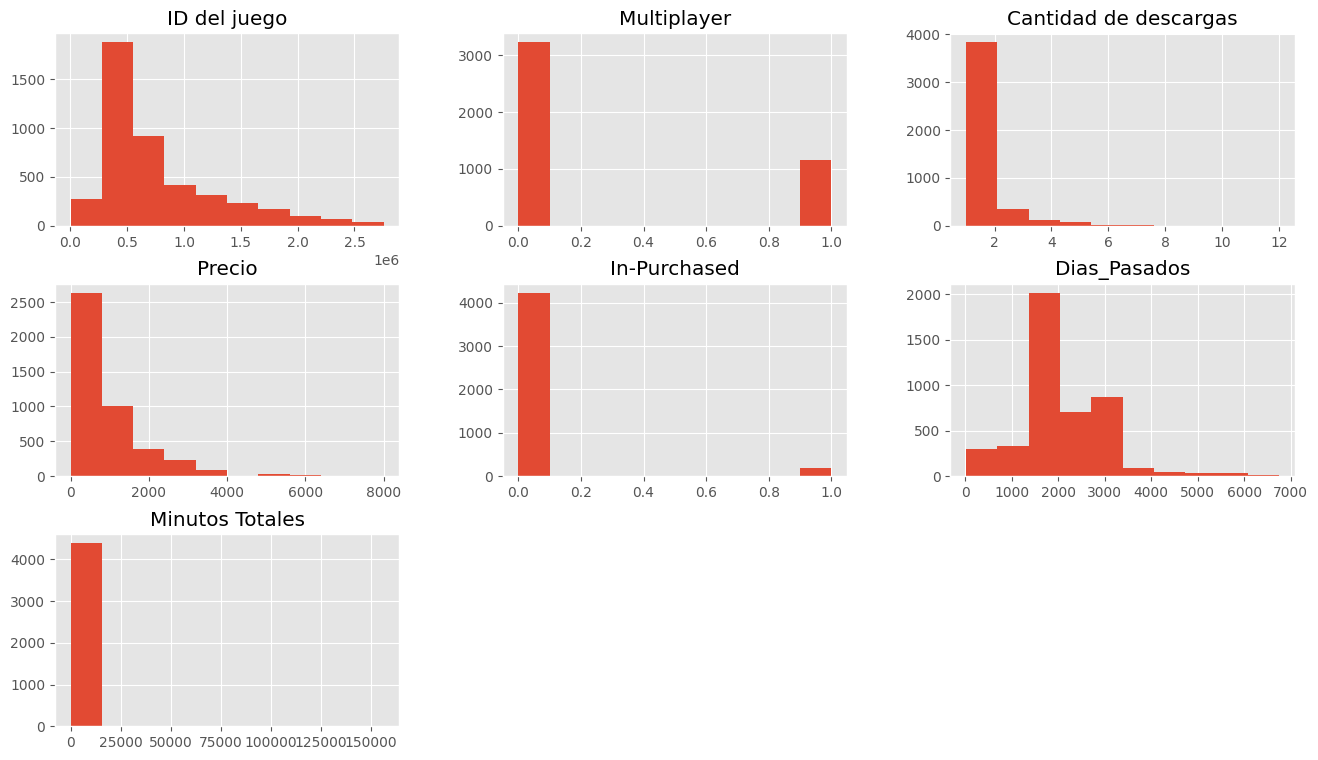

In [10]:
data1.hist()
plt.show()

In [11]:
print(data1.groupby('In-Purchased').size())

In-Purchased
0    4231
1     180
dtype: int64


In [12]:
print(data1.groupby('Minutos Totales').size())

Minutos Totales
1         203
2          76
3          46
4          41
5          37
         ... 
37655       1
38688       1
39282       1
53040       1
156425      1
Length: 1235, dtype: int64


<Axes: xlabel='In-Purchased', ylabel='count'>

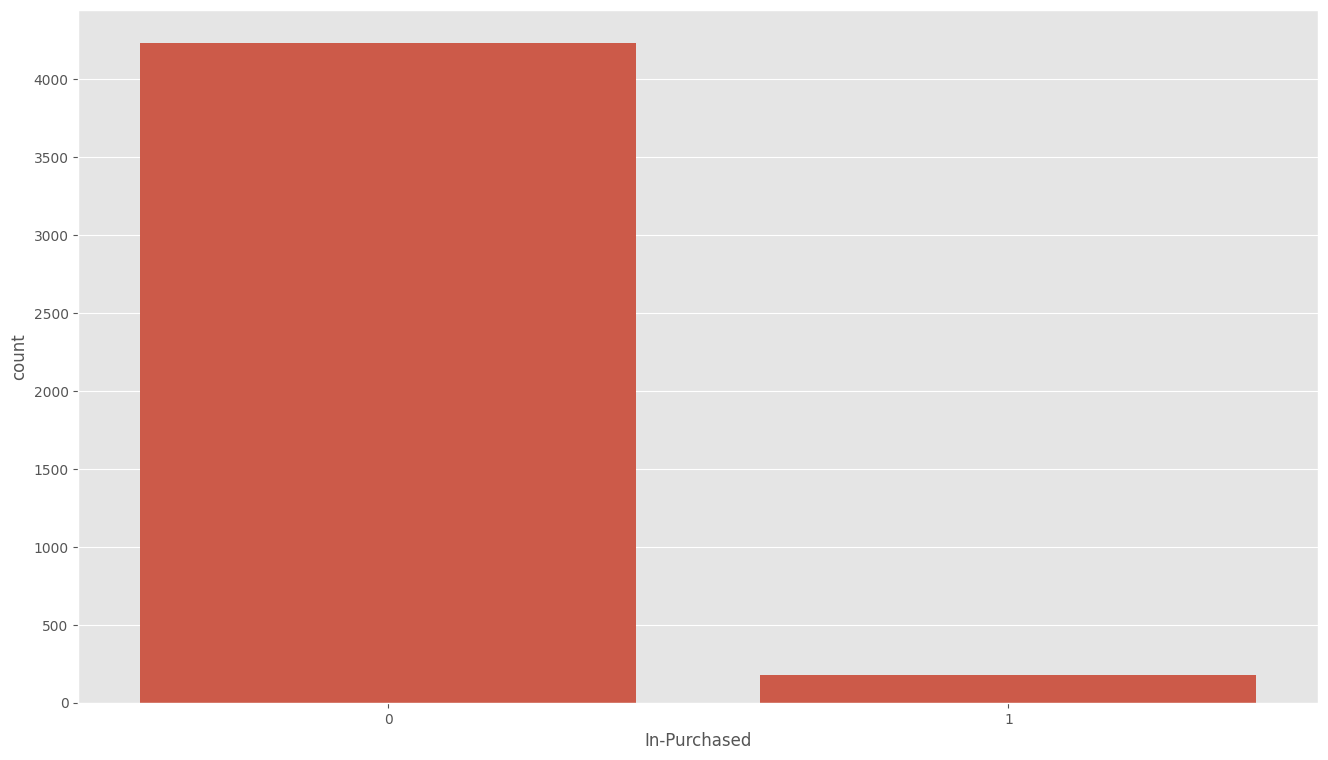

In [13]:
sb.countplot(x='In-Purchased', data=data1)


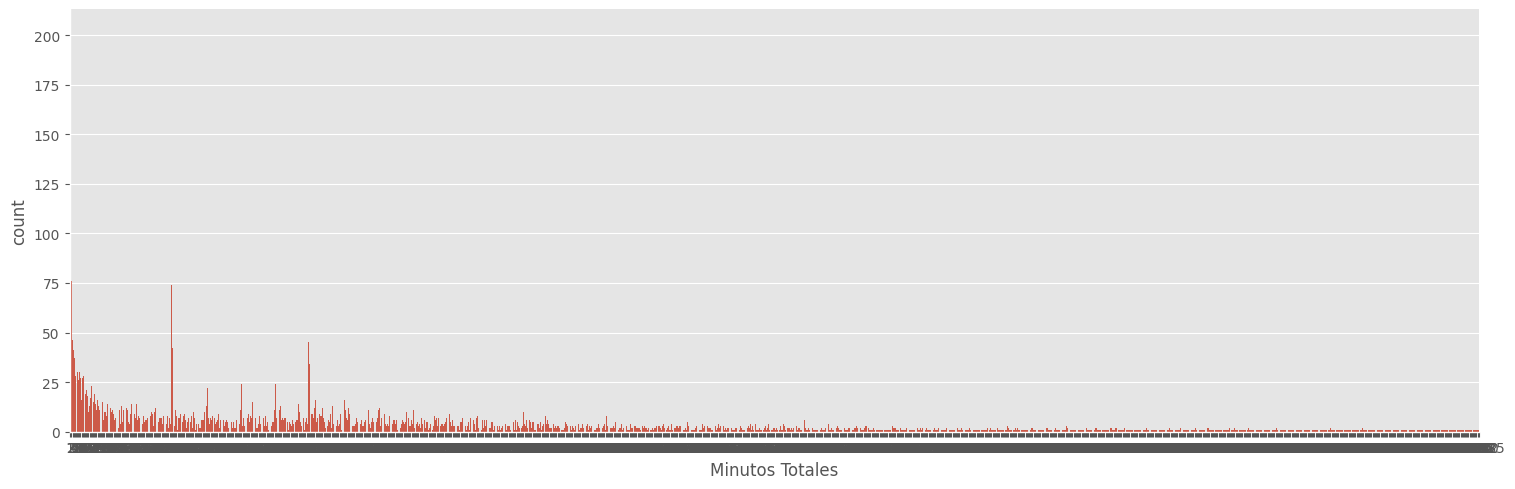

In [14]:
sb.catplot(x='Minutos Totales', data=data1, kind='count', aspect=3)


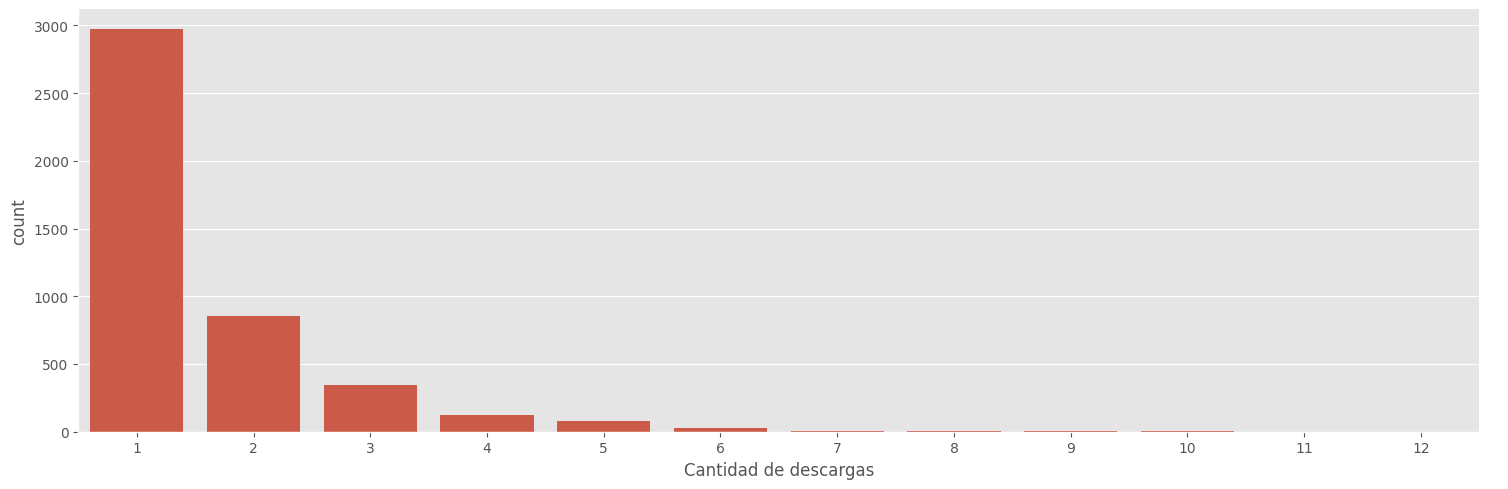

In [15]:
sb.catplot(x='Cantidad de descargas', data=data1, kind='count', aspect=3)


In [16]:
# Convertir la columna de cadena a tipo entero
data1['Cantidad de descargas'] = pd.to_numeric(data1['Cantidad de descargas'], errors='coerce').astype('Int64')
data1['Cantidad de descargas'] = data1['Cantidad de descargas'].fillna(0)


In [17]:
X = data1[['Cantidad de descargas']].values
y = data1['Multiplayer'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
data1.dtypes

ID del juego               int64
Géneros                   object
Categorías                object
Fecha de Lanzamiento      object
Multiplayer              float64
Cantidad de descargas      Int64
Precio                     int64
In-Purchased               int64
Fecha                     object
Dias_Pasados               int64
Minutos Totales            int64
dtype: object

In [19]:
n_neighbors = 7


y_train = np.nan_to_num(y_train, nan=0, posinf=0, neginf=0, copy=True)
y_test = np.nan_to_num(y_test, nan=0, posinf=0, neginf=0, copy=True)

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.73


In [20]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[805   0]
 [298   0]]
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       805
         1.0       0.00      0.00      0.00       298

    accuracy                           0.73      1103
   macro avg       0.36      0.50      0.42      1103
weighted avg       0.53      0.73      0.62      1103



C:\Users\oem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:

In [21]:
#
#h = .0000001  # step size in the mesh
 
# Create color maps
#cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
#cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
#clf = KNeighborsClassifier(n_neighbors, weights='distance')
#clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 #                        np.arange(y_min, y_max, h))
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
#Z = Z.reshape(xx.shape)
#plt.figure()
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
 #               edgecolor='k', s=20)
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
    
#patch0 = mpatches.Patch(color='#FF0000', label='1')
#patch1 = mpatches.Patch(color='#ff9933', label='2')
#patch2 = mpatches.Patch(color='#FFFF00', label='3')
#patch3 = mpatches.Patch(color='#00ffff', label='4')
#patch4 = mpatches.Patch(color='#00FF00', label='5')
#plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
#plt.title("5-Class classification (k = %i, weights = '%s')"
 #             % (n_neighbors, weights))
 
#plt.show()

In [22]:
# 1. Cargar los datos desde el CSV
#data = pd.read_csv('tu_archivo.csv')

# Seleccionar las columnas de interés
X = data1[['Cantidad de descargas','Minutos Totales','Dias_Pasados']]
y = data1['Multiplayer']  

#y = data1[['Cantidad de descargas']]
#x= data1['Multiplayer']  


#En caso de que y haya nan sean 0 
y = np.nan_to_num(y, nan=0)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar las características (opcional pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Inicializar los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# 5. Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# 6. Mostrar los resultados
for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy}')


Logistic Regression: Accuracy = 0.7406568516421291
Decision Tree: Accuracy = 0.6206115515288788
Random Forest: Accuracy = 0.6647791619479049
SVM: Accuracy = 0.739524348810872


In [23]:

# Reemplazar NaN con 0 en la variable y_train
y_train = np.nan_to_num(y_train, nan=0)
y_test = np.nan_to_num(y_test, nan=0)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)


Logistic Regression: Accuracy = 0.7406568516421291
Decision Tree: Accuracy = 0.608154020385051
Random Forest: Accuracy = 0.6613816534541337
SVM: Accuracy = 0.739524348810872


In [24]:
# Reemplazar NaN con 0 en las variables X e y
X = np.nan_to_num(X, nan=0)
y = np.nan_to_num(y, nan=0)

# Definir una función para evaluar los modelos usando validación cruzada
def evaluar_modelo(modelo, X, y):
    scores = cross_val_score(modelo, X, y, cv=5)
    return scores.mean(), scores.std()

# Comparar los modelos
resultados = {}
for nombre, modelo in models.items():
    media, desviacion = evaluar_modelo(modelo, X, y)
    resultados[nombre] = (media, desviacion)

mejor_modelo = max(resultados, key=lambda k: resultados[k][0])
print("El mejor modelo es:", mejor_modelo)

# Imprimir los resultados
for nombre, (media, desviacion) in resultados.items():
    print(f"{nombre}: Accuracy medio = {media}, Desviación estándar = {desviacion}")

# Interpretar los resultados
# Analiza los resultados y toma una decisión sobre qué modelo es el mejor en función de las métricas y tus objetivos específicos.


El mejor modelo es: Logistic Regression
Logistic Regression: Accuracy medio = 0.7370210296274039, Desviación estándar = 0.0019009265269288851
Decision Tree: Accuracy medio = 0.6071165347981398, Desviación estándar = 0.015930842797123937
Random Forest: Accuracy medio = 0.6440677139107814, Desviación estándar = 0.018960023453840662
SVM: Accuracy medio = 0.7370210296274039, Desviación estándar = 0.0007269025934142064


In [25]:
from sklearn.metrics import make_scorer, mean_squared_error

# Definir una función para evaluar los modelos usando validación cruzada
def evaluar_modelo(modelo, X, y):
    mse = make_scorer(mean_squared_error)
    scores = cross_val_score(modelo, X, y, cv=5, scoring=mse)
    return scores.mean(), scores.std()

# Comparar los modelos
resultados = {}
for nombre, modelo in models.items():
    media, desviacion = evaluar_modelo(modelo, X, y)
    resultados[nombre] = (media, desviacion)

mejor_modelo = min(resultados, key=lambda k: resultados[k][0])  # El mejor modelo es el que tiene el MSE más bajo
print("El mejor modelo es:", mejor_modelo)

# Imprimir los resultados
for nombre, (media, desviacion) in resultados.items():
    print(f"{nombre}: MSE medio = {media}, Desviación estándar = {desviacion}")

El mejor modelo es: Logistic Regression
Logistic Regression: MSE medio = 0.262978970372596, Desviación estándar = 0.0019009265269288598
Decision Tree: MSE medio = 0.38789428946361476, Desviación estándar = 0.018642753061804802
Random Forest: MSE medio = 0.3563863144351739, Desviación estándar = 0.02224647898158007
SVM: MSE medio = 0.262978970372596, Desviación estándar = 0.0007269025934141919


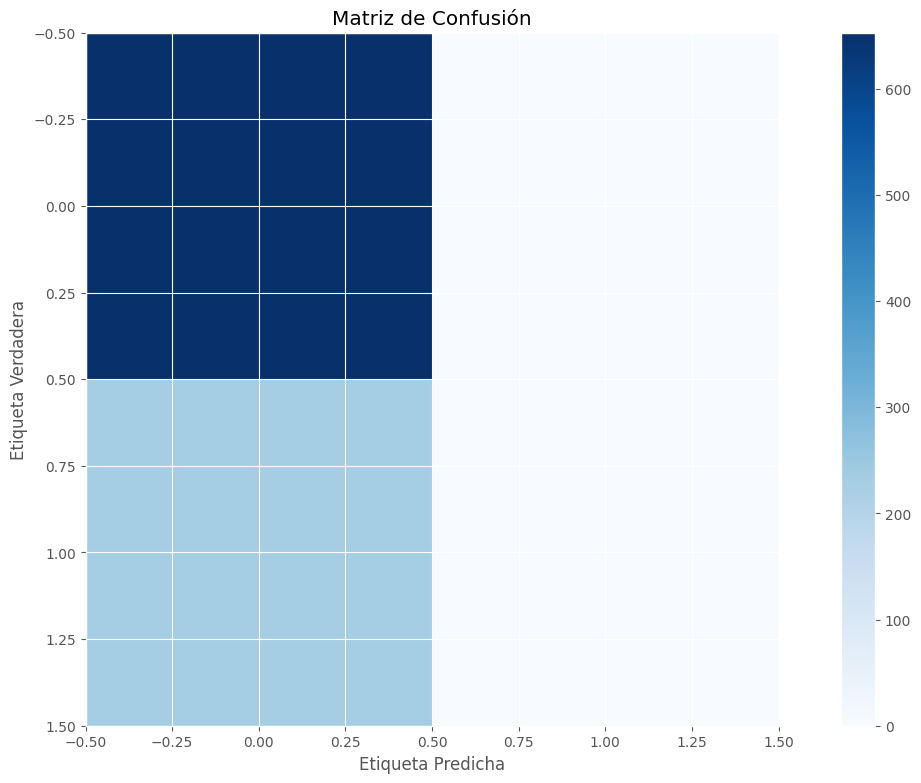

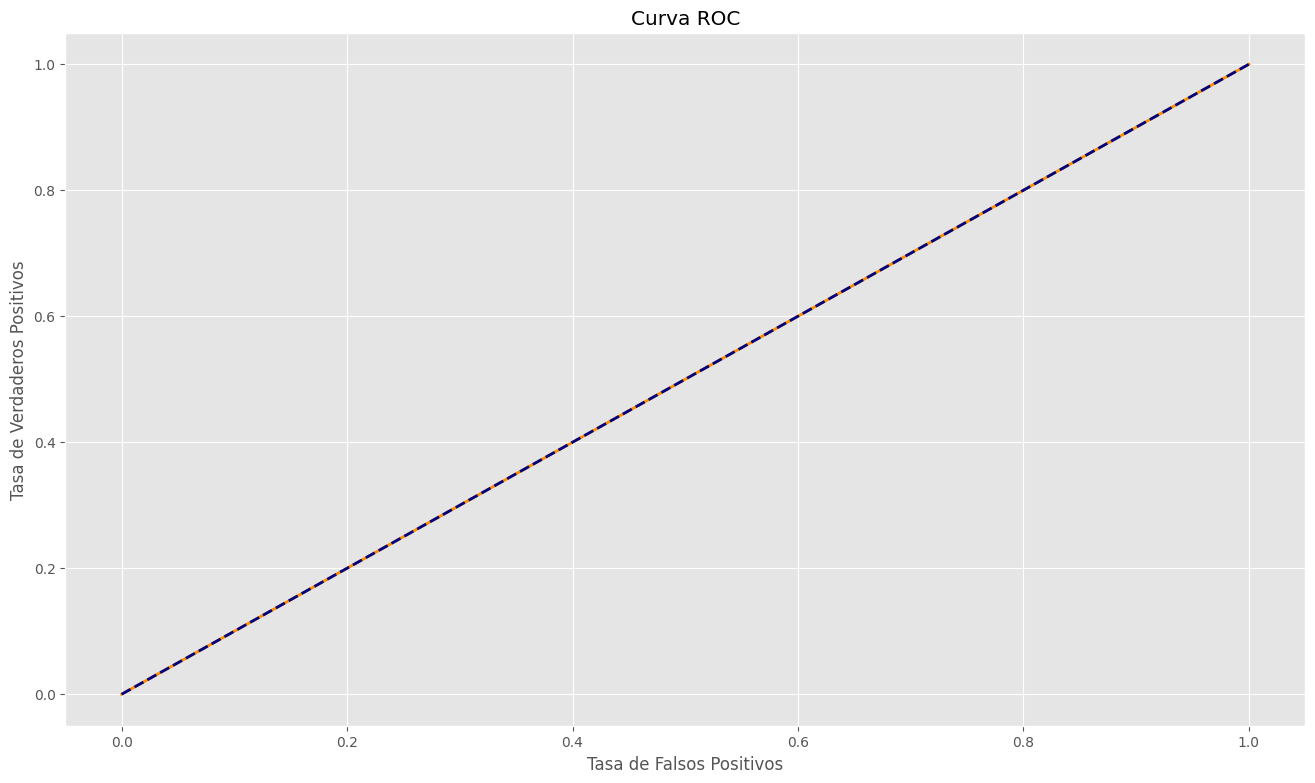

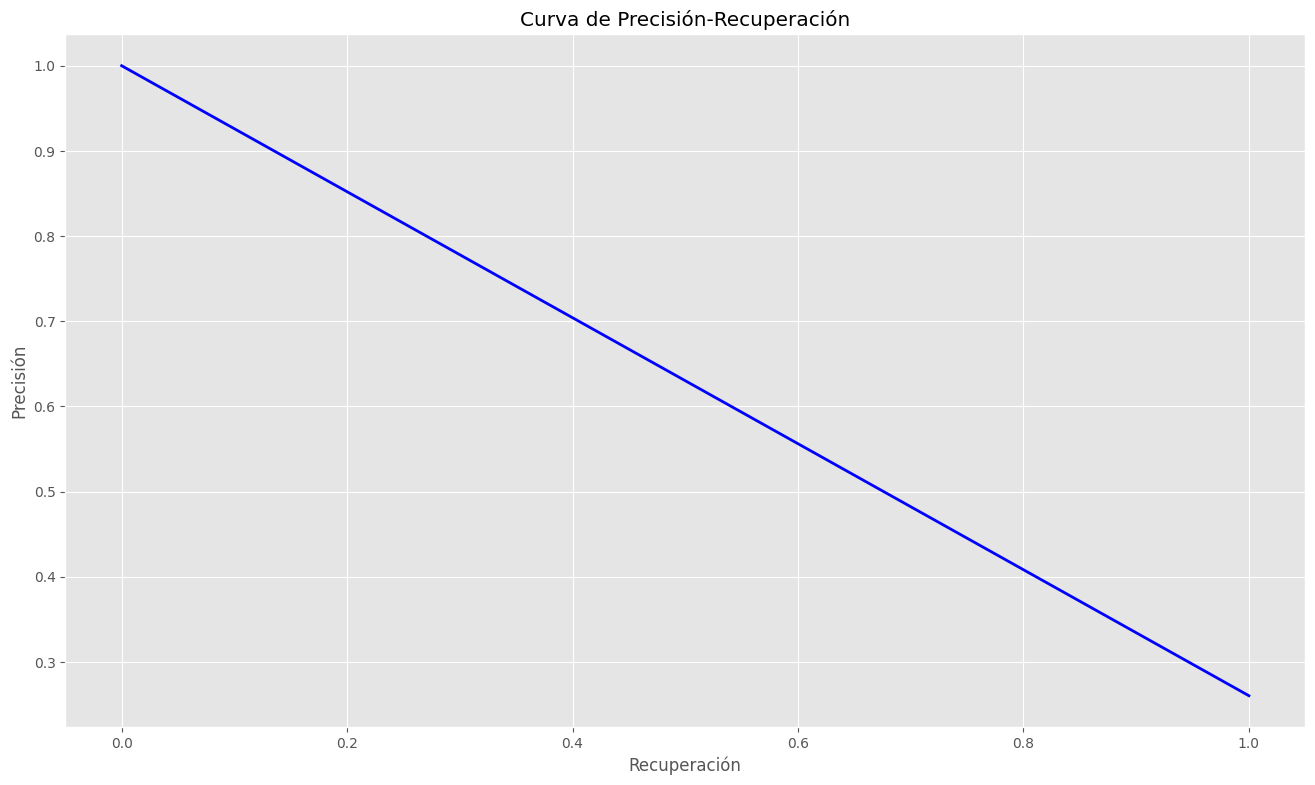

In [26]:
# Supongamos que y_true son las etiquetas verdaderas y y_pred son las predicciones del modelo
# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Calculamos la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Graficamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()

# Calculamos la curva de precisión-recuperación
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Graficamos la curva de precisión-recuperación
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recuperación')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recuperación')
plt.show()


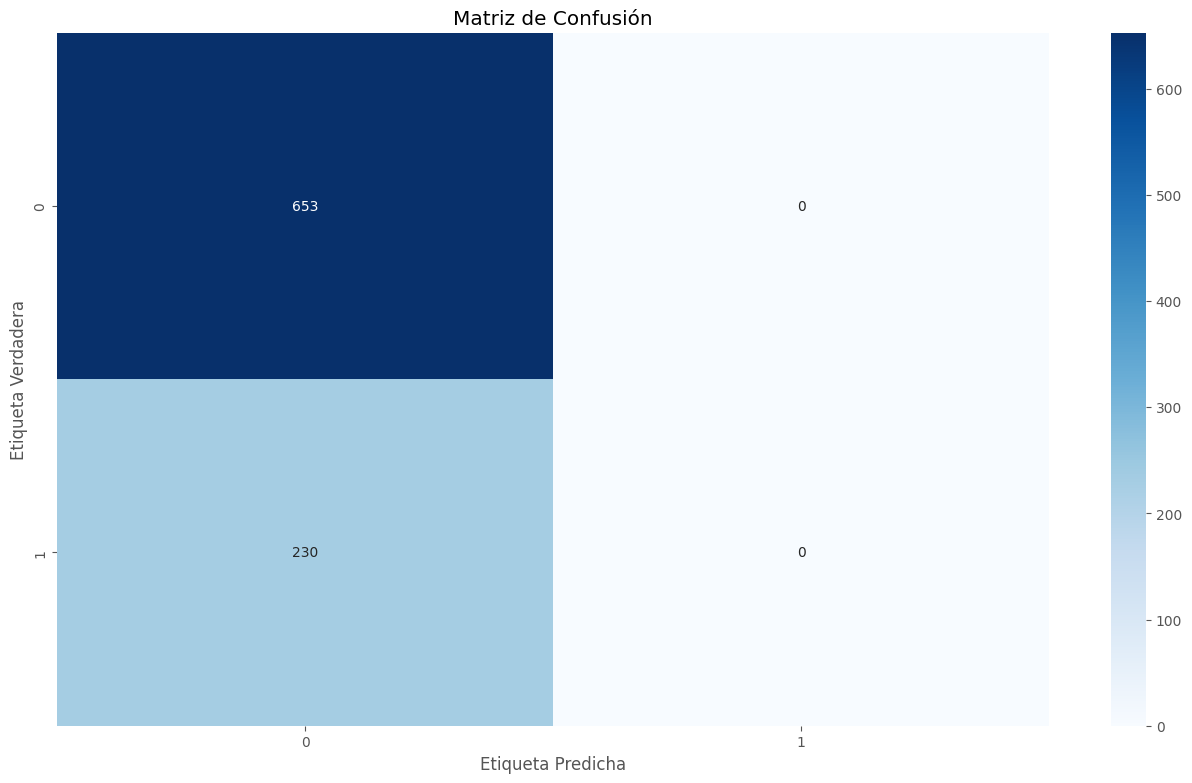

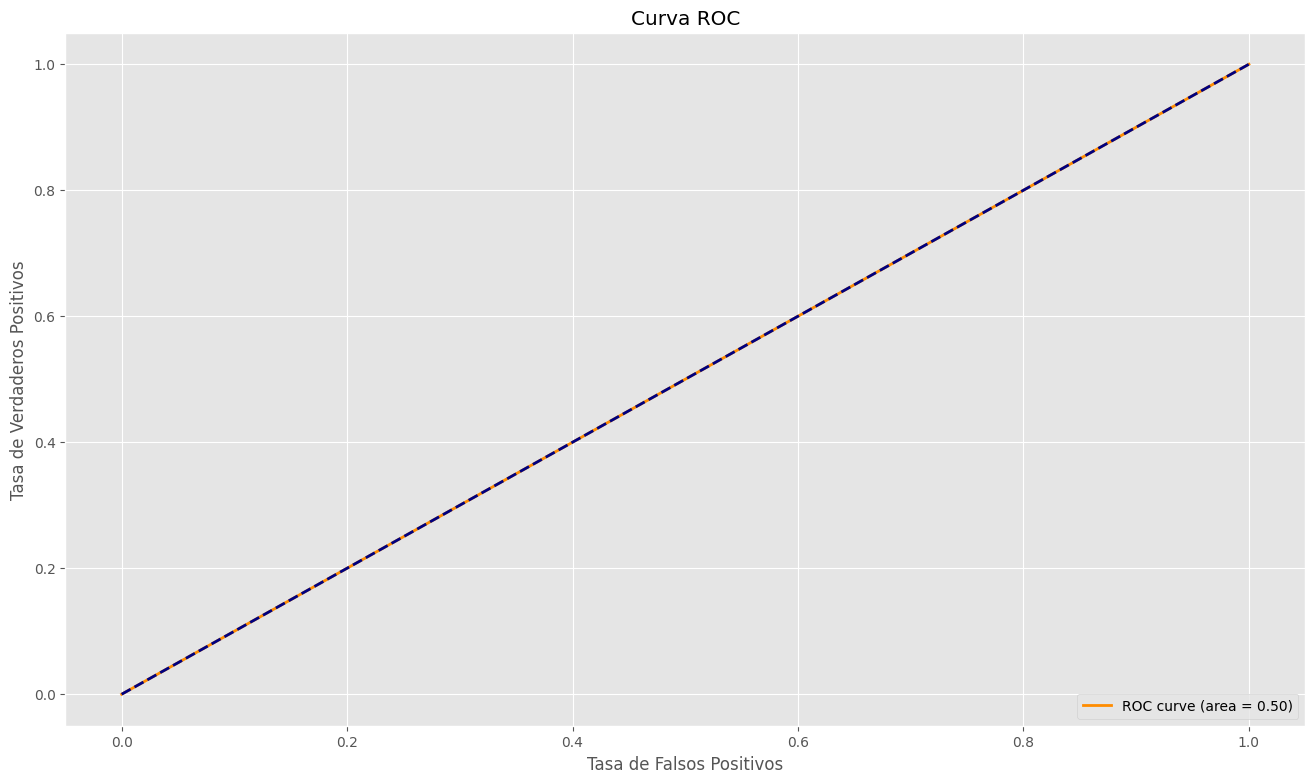

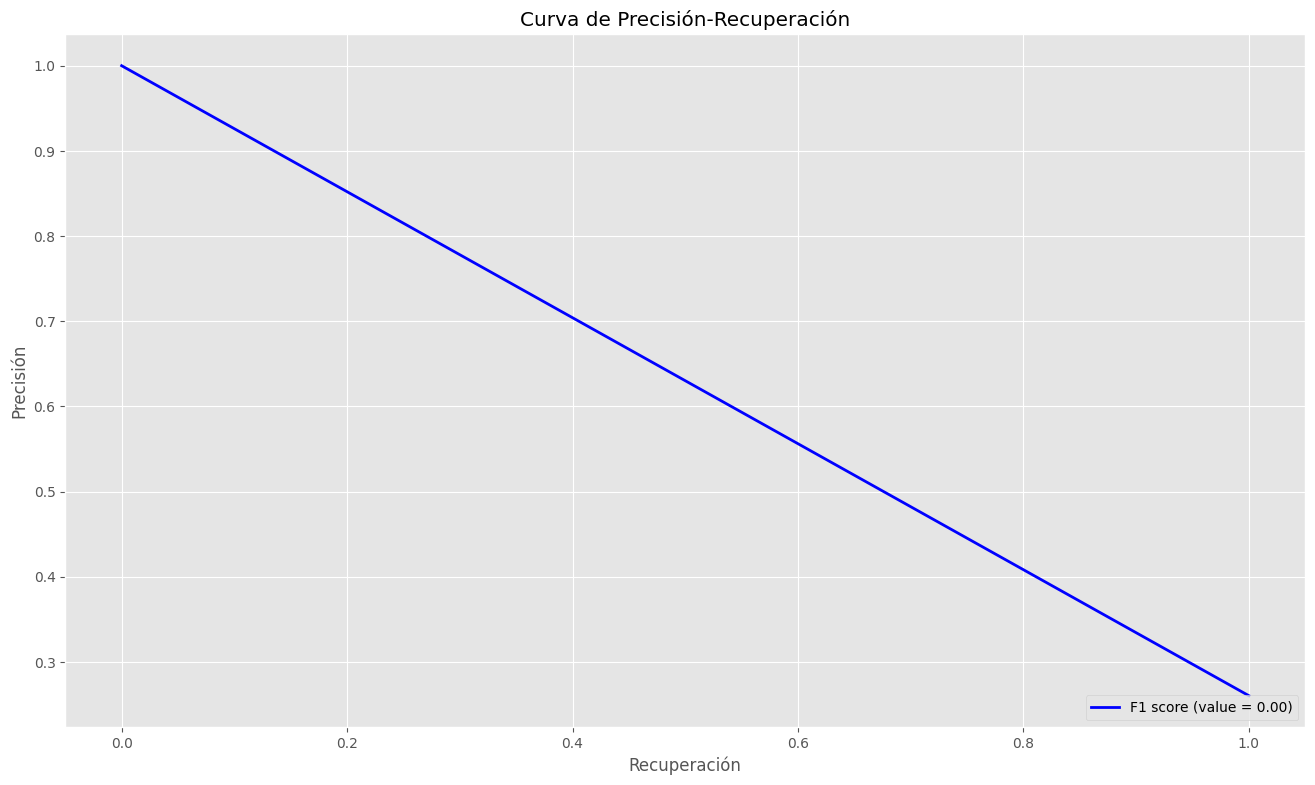

In [27]:
import seaborn as sns
from sklearn.metrics import auc, f1_score

# Supongamos que y_true son las etiquetas verdaderas y y_pred son las predicciones del modelo
# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión con anotaciones
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Calculamos la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC con AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Calculamos la curva de precisión-recuperación
precision, recall, _ = precision_recall_curve(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Graficamos la curva de precisión-recuperación con F1 score
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='F1 score (value = %0.2f)' % f1)
plt.xlabel('Recuperación')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recuperación')
plt.legend(loc="lower right")
plt.show()


Cantidad de juegos multijugador: 1160
Cantidad de juegos en solitario: 3225
Proporción de juegos multijugador: 0.2645381984036488
Proporción de juegos en solitario: 0.7354618015963512
La hipótesis de que los juegos en solitario son más populares es compatible con los datos.


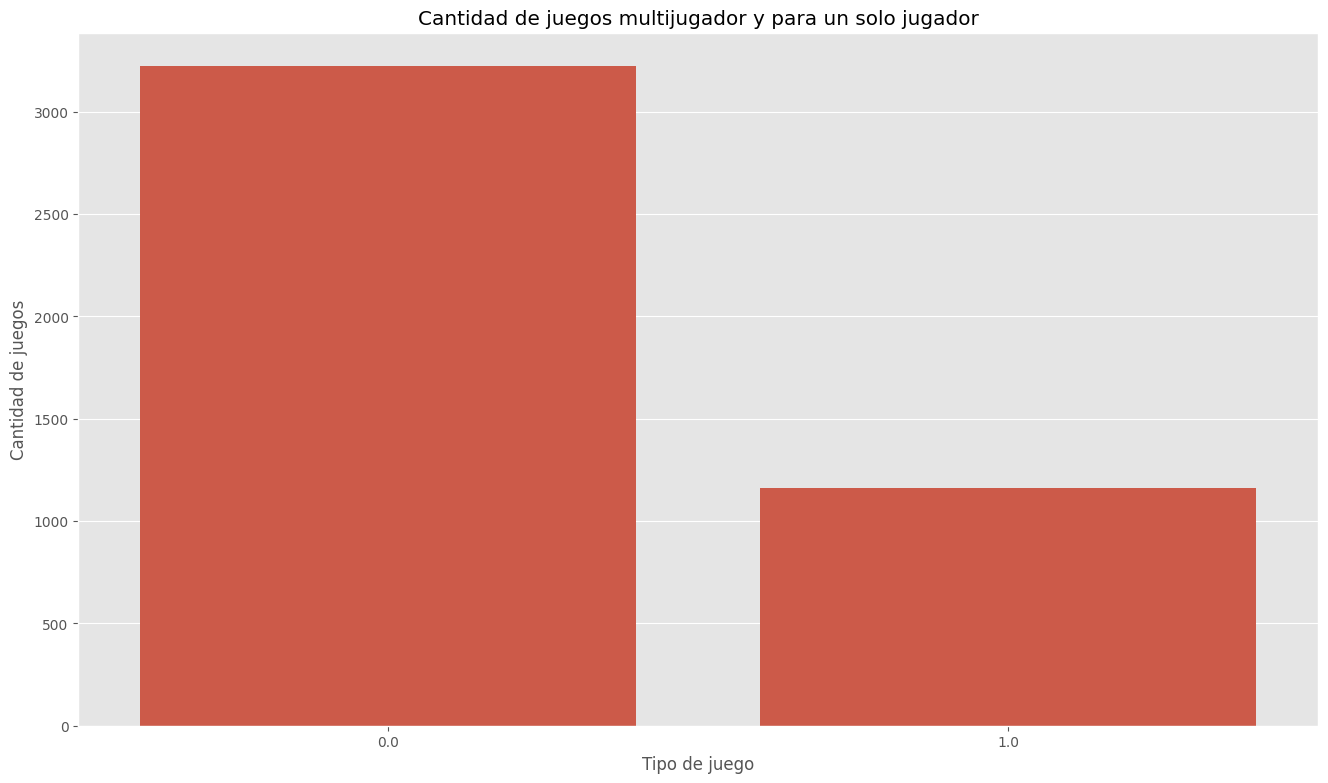

In [28]:
# Contar la cantidad de juegos multijugador y para un solo jugador
multijugador = df[df['Multiplayer'] == 1].shape[0]
solitario = df[df['Multiplayer'] == 0].shape[0]

# Calcular las proporciones
proporcion_multijugador = multijugador / df.shape[0]
proporcion_solitario = solitario / df.shape[0]

print("Cantidad de juegos multijugador:", multijugador)
print("Cantidad de juegos en solitario:", solitario)
print("Proporción de juegos multijugador:", proporcion_multijugador)
print("Proporción de juegos en solitario:", proporcion_solitario)

if proporcion_multijugador > proporcion_solitario:
    print("La hipótesis de que los juegos multijugador son más populares es compatible con los datos.")
elif proporcion_multijugador < proporcion_solitario:
    print("La hipótesis de que los juegos en solitario son más populares es compatible con los datos.")
else:
    print("No se puede concluir que un tipo de juego sea más popular que el otro basado en estos datos.")

# Graficar los datos
sns.countplot(x='Multiplayer', data=df)
plt.xlabel('Tipo de juego')
plt.ylabel('Cantidad de juegos')
plt.title('Cantidad de juegos multijugador y para un solo jugador')
plt.show()